## Task: Topic Modeling and Text Visualization :

**Topic Modeling:** Extracting Topics from a Corpus

* Consider using the Gensim library for topic modeling. [Gensim](https://radimrehurek.com/gensim/)

**Text Visualization:** Selection of Text Data Visualization Libraries (Any of your choice)

* Explore various libraries for visualizing textual data.


### Problem

The problem being addressed is the extraction of meaningful topics from a corpus of text and the visualization of these topics to gain insights into the content.

### Solution

The solution involves the following steps:

#### `get_data`

This function retrieves text summaries from Wikipedia based on a list of specified topics. It uses the Wikipedia API to fetch the summaries.

#### `processing_data`

This function processes the retrieved text data. It tokenizes the text into sentences, removes common words (stop words), punctuation, and tokenizes the sentences. It returns two lists: `texts` containing processed documents and `texts_original` containing the original tokenized documents.

#### Topic Modeling with LDA

1. The text data is processed using the `processing_data` function.
2. A Gensim Dictionary is created to assign an ID to each token in the corpus.
3. A Gensim corpus is created to represent the tokenized text data as a list of (token_id, token_count) pairs.
4. Topic modeling is performed using the LdaModel from Gensim. The algorithm is run for different numbers of topics (ranging from 2 to 5) to find the best number of topics.
5. Coherence scores are computed for each model using the C_V coherence measure.
6. The best number of topics is selected based on the highest coherence score.
7. The LDA model is trained with the best number of topics.
8. The topics are displayed using the `show_topics` function of the LDA model.

#### Text Visualization with pyLDAvis

1. pyLDAvis is used to enable notebook visualization.
2. Data is prepared for visualization using the `prepare` function from pyLDAvis.
3. The prepared data is displayed using `pyLDAvis.display` for interactive visualization.

## Inferring and perplexity


#### Extracting Keywords for Each Topic

- The function aims to retrieve a specified number of main keywords for each topic identified by the LDA model. This helps in summarizing and understanding the key themes within each topic by selecting the most important words.

#### Exploring Semantic Relationships with WordNet

- The function utilizes NLTK's WordNet to explore semantic relationships among the keywords extracted for each topic. The primary objective is to uncover related terms and concepts within each topic by finding hyponyms (more specific words) and hypernyms (more general words) for each keyword.

#### Inferring Topics from Keywords

- The function attempts to infer the topics based on the extracted keywords and their associated semantic relationships. It identifies the most frequent word within each topic's semantic relationships, providing insights into the central theme of each topic.

#### Calculating Perplexity

- The  perplexity assesses the performance of the LDA model on a separate test corpus. The goal is to measure how well the model predicts the test corpus, with a lower perplexity score indicating better model performance on unseen data. This helps evaluate the effectiveness of the topic modeling model.


In [5]:
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
from nltk.corpus import stopwords
import wikipediaapi
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


In [6]:

stop_words = stopwords.words('english')
stop_words.extend(['also','may','many','provide','different','first','often','others','form'])
stop_words=set(stop_words)

puntuaction=set(['.',',','?','!',':',';','"','-','(',')'])
def get_data():
    """
    Retrieves data from Wikipedia based on a list of titles.

    Returns:
        str: A string containing the summaries of the Wikipedia pages.
    """
    user_agent = "university_project/1.0"
    wiki_wiki = wikipediaapi.Wikipedia(user_agent, 'en')

    titles = [
        # # Topic 1: Education
        # 'School', 'University', 'College',

        # # Topic 2: Combat Sports
        # 'Mma', 'Boxing', 'Muay thai',

        # Topic 3: Nutrition
        'Food', 'Junk Food', 'Vegan'

        # Topic 4: Technology
        'Artificial Intelligence', 'Internet of Things', 'Robotics',

        # # Topic 5: Literature
        # 'Novels', 'Poetry', 'Drama',
        # Topic 2: Combat Sports
        'Baseball', 'Football', 'Basketball',

    ]
    summaries = [wiki_wiki.page(title).summary for title in titles]

    return ' '.join(summaries)

def get_data_test():
    """
    Retrieves test data from Wikipedia based on a list of titles.

    Returns:
        str: A string containing the summaries of the Wikipedia pages.
    """
    user_agent = "university_project/1.0"
    wiki_wiki = wikipediaapi.Wikipedia(user_agent, 'en')

    titles = [
        # # Topic 1: Education
        'School', 'University', 'College',

        # # Topic 2: Combat Sports
        'Mma', 'Boxing', 'Muay thai',

        # Topic 3: Nutrition
        # 'Food', 'Junk Food', 'Vegan'

        # Topic 4: Technology
        # 'Artificial Intelligence', 'Internet of Things', 'Robotics',

        # # Topic 5: Literature
        # 'Novels', 'Poetry', 'Drama',
        # Topic 2: Combat Sports
        # 'Baseball', 'Football', 'Basketball',

    ]
    summaries = [wiki_wiki.page(title).summary for title in titles]

    return ' '.join(summaries)

def processing_data(text):
    """
    Processes the input text by removing common words, punctuation, and tokenizing it.

    Args:
        text (str): The input text to be processed.

    Returns:
        tuple: A tuple containing two lists:
            - texts: A new corpus of documents after processing.
            - texts_original: The original corpus of documents (only tokenized).
    """
    texts = []  # new corpus of documents after processing
    texts_original = []  # original corpus of documents (only tokenized)
    text = text.split('.')  # divide the text into sentences/lines
    for line in text:
        line_original = line.translate(str.maketrans('', '', ''.join(punctuation))).lower().split()
        line = set(line_original) - stop_words
        texts.append(line)
        texts_original.append(line_original)

    return texts, texts_original


In [16]:
import numpy as np
texts, texts_original = processing_data(get_data())
dictionary = corpora.Dictionary(texts)                  #assign an id to each token
corpus = [dictionary.doc2bow(text) for text in texts]   #(token_id, token_count)

texts_test, texts_original_test = processing_data(get_data_test())
dictionary_test = corpora.Dictionary(texts_test)                  #assign an id to each token
corpus_test = [dictionary.doc2bow(text) for text in texts_test]   #(token_id, token_count)

# Perform LDA topic modeling
coherence_scores = []
perplexity_scores = []
for num_topics in range(2, 6):  # Testing different numbers of topics
    lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary,chunksize=100,   
    alpha='auto',  
    eta='auto',
    passes=10 )
    coherence_model = CoherenceModel(model=lda_model, texts=texts_original, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((num_topics, coherence_score))
    # Calculate and append perplexity score
    perplexity_score = lda_model.log_perplexity(corpus_test)
    perplexity_scores.append((num_topics, perplexity_score))
    print(f"Number of Topics: {num_topics}, Coherence Score: {coherence_score}, Perplexity Score: {perplexity_score}")



# Find the best number of topics based on coherence score
best_num_topics = max(coherence_scores, key=lambda x: x[1])[0]
print(f"Best Number of Topics: {best_num_topics}")

# Train LDA model with the best number of topics
best_lda_model = LdaModel(corpus, num_topics=best_num_topics, id2word=dictionary)
print(best_lda_model.show_topics())   #list of words with their respective probabilities of belonging to that topic


Number of Topics: 2, Coherence Score: 0.4911133527230327, Perplexity Score: -8.593714404899163
Number of Topics: 3, Coherence Score: 0.5460148321984716, Perplexity Score: -10.112759153090833
Number of Topics: 4, Coherence Score: 0.4989683421122797, Perplexity Score: -11.210254552794117
Number of Topics: 5, Coherence Score: 0.4993711304548484, Perplexity Score: -12.043843438696964
Best Number of Topics: 3
[(0, '0.010*"robotics" + 0.009*"field" + 0.008*"robots" + 0.007*"team" + 0.006*"food" + 0.006*"systems" + 0.006*"engineering" + 0.005*"ball" + 0.005*"players" + 0.005*"batting"'), (1, '0.011*"food" + 0.009*"football" + 0.008*"world" + 0.008*"team" + 0.007*"players" + 0.007*"century" + 0.007*"teams" + 0.007*"sport" + 0.006*"sports" + 0.006*"baseball"'), (2, '0.007*"basketball" + 0.007*"robots" + 0.007*"one" + 0.006*"team" + 0.006*"league" + 0.006*"ball" + 0.006*"play" + 0.006*"humans" + 0.005*"game" + 0.005*"systems"')]


### plot the coherence_scores and perplexity_scores

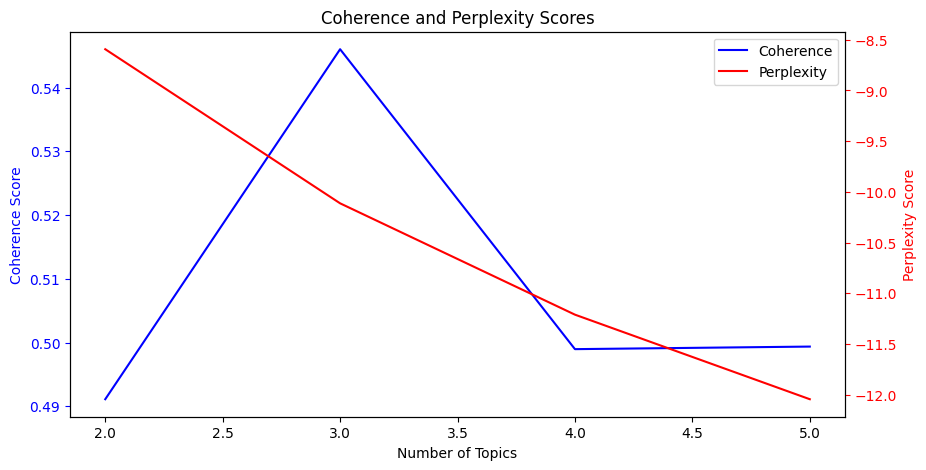

In [17]:
import matplotlib.pyplot as plt
# Extract x values (number of topics) and y values (coherence and perplexity scores)
topics = [a for a, _ in coherence_scores]
coherence_values = [b for _, b in coherence_scores]
perplexity_values = [b for _, b in perplexity_scores]

# Create a figure and plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot coherence score on the left y-axis
ax1.plot(topics, coherence_values, 'b-', label='Coherence')
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis on the right for perplexity score
ax2 = ax1.twinx()
ax2.plot(topics, perplexity_values, 'r-', label='Perplexity')
ax2.set_ylabel('Perplexity Score', color='r')
ax2.tick_params('y', colors='r')

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.title('Coherence and Perplexity Scores')
plt.show()



In [18]:
pyLDAvis.enable_notebook()
visualize_data = pyLDAvis.gensim_models.prepare(best_lda_model, corpus, dictionary)
pyLDAvis.display(visualize_data)

In [19]:
def extract_keywords(number):
    '''return a list of the (number) main words for each topic'''
    topic_list=[]
    l = best_lda_model.print_topics()
    result = [" ".join(x[1].strip('"') for x in sorted((e.split("*") for e in sl[1].split(" + ")),key=lambda x:float(x[0]),reverse=True)[:number]) for sl in l]
    for i in result:
        topic_list.append(i.split())
    return topic_list

topic_list = extract_keywords(8)
print(topic_list)

[['robotics', 'field', 'robots', 'team', 'food', 'systems', 'engineering', 'ball'], ['food', 'football', 'world', 'team', 'players', 'century', 'teams', 'sport'], ['basketball', 'robots', 'one', 'team', 'league', 'ball', 'play', 'humans']]


In [20]:


from nltk.corpus import wordnet as wn

synsets = []
counter = 0

for j in topic_list:
    synsets.append([])
    for tp in topic_list[counter]:
        for ss in wn.synsets(str(tp)):
            for hypon in ss.hyponyms(): #trovo gli iponimi
                synsets[counter].append(hypon)
            for hyper in ss.hypernyms(): #trovo gli iponimi
                synsets[counter].append(hyper)
    counter += 1

print(synsets)

[[Synset('animatronics.n.01'), Synset('telerobotics.n.01'), Synset('artificial_intelligence.n.01'), Synset('campus.n.01'), Synset('firebreak.n.01'), Synset('grainfield.n.01'), Synset('lawn.n.01'), Synset('paddy.n.02'), Synset('yard.n.02'), Synset('tract.n.01'), Synset('tract.n.01'), Synset('region.n.03'), Synset('allometry.n.01'), Synset('architecture.n.02'), Synset('bibliotics.n.01'), Synset('communications.n.01'), Synset('engineering.n.02'), Synset('escapology.n.01'), Synset('frontier.n.03'), Synset('futurology.n.01'), Synset('genealogy.n.02'), Synset('graphology.n.01'), Synset('humanistic_discipline.n.01'), Synset('major.n.04'), Synset('military_science.n.01'), Synset('numerology.n.01'), Synset('occultism.n.01'), Synset('ology.n.01'), Synset('protology.n.01'), Synset('science.n.01'), Synset('theogony.n.01'), Synset('theology.n.01'), Synset('knowledge_domain.n.01'), Synset('electric_field.n.01'), Synset('gravitational_field.n.01'), Synset('magnetic_field.n.01'), Synset('radiation_fie

In [21]:


from collections import Counter

#Try to infer the topic from keywords
def obtain_synset(synsets_list):
    max_value = 0
    counter = 0

    for hyp in synsets_list:
        counter += 1
        print("Topic " + str(counter))
        dic = Counter(hyp)
        for (key,value) in zip(dic.keys(),dic.values()):
            if value > max_value:
                max_value = value
        for (key,value) in zip(dic.keys(),dic.values()):
            if value == max_value:
                print(key,value)
        max_value = 0
        print()
                
obtain_synset(synsets)        



Topic 1
Synset('tract.n.01') 3
Synset('set.n.01') 3

Topic 2
Synset('professional_football.n.01') 2
Synset('contact_sport.n.01') 2
Synset('a-team.n.01') 2
Synset('baseball_team.n.01') 2
Synset('basketball_team.n.01') 2
Synset('battery.n.04') 2
Synset('crew.n.04') 2
Synset('defense.n.03') 2
Synset('flying_squad.n.01') 2
Synset('football_team.n.01') 2
Synset('hit_squad.n.01') 2
Synset('hockey_team.n.01') 2
Synset('junior_varsity.n.01') 2
Synset('little-league_team.n.01') 2
Synset('major-league_team.n.01') 2
Synset('minor-league_team.n.01') 2
Synset('offense.n.04') 2
Synset('police_squad.n.01') 2
Synset('powerhouse.n.02') 2
Synset('second_string.n.01') 2
Synset('section.n.05') 2
Synset('varsity.n.02') 2
Synset('unit.n.03') 2
Synset('relay.n.03') 2
Synset('animal_group.n.01') 2
Synset('group.v.02') 2
Synset('performer.n.01') 2
Synset('person.n.01') 2

Topic 3
Synset('diversion.n.01') 3
Synset('gamble.v.02') 3
Synset('act.v.01') 3
Synset('perform.v.03') 3



### calculate perplexity of the model

In [22]:
texts_test, texts_original_test = processing_data(get_data_test())
dictionary_test = corpora.Dictionary(texts_test)                  #assign an id to each token
corpus_test = [dictionary.doc2bow(text) for text in texts_test]   #(token_id, token_count)
# Calculate the log perplexity of the test corpus
log_perplexity = best_lda_model.log_perplexity(corpus_test)

# Print the log perplexity
print(log_perplexity)

-10.297941836711761
